In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import os
%matplotlib inline

In [2]:
%pip install statsmodels
import statsmodels.stats.weightstats as ssw

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Valentin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Экспонициальное распределение
ex=sts.expon()
real_m=ex.mean()
real_v=ex.var()
real_s=ex.std()
print(real_m,real_v,real_s,real_s) # настоящее среднее случайной величины


1.0 1.0 1.0 1.0


In [5]:
samp_ex=ex.rvs(100)
samp_ex
print(samp_ex.mean(),samp_ex.var(),samp_ex.std()) # выборочные среднее случайной величины

0.8195071807544204 0.49643837132656565 0.7045838284594429


### Постройте гистограмму выборки и теоретическую плотность распределения


[0.80828958 0.89809954 0.50892307 0.20955656 0.20955656 0.14968326
 0.08980995 0.0598733  0.         0.0598733 ] [0.02978539 0.36382409 0.69786279 1.03190149 1.36594018 1.69997888
 2.03401758 2.36805628 2.70209498 3.03613368 3.37017238]


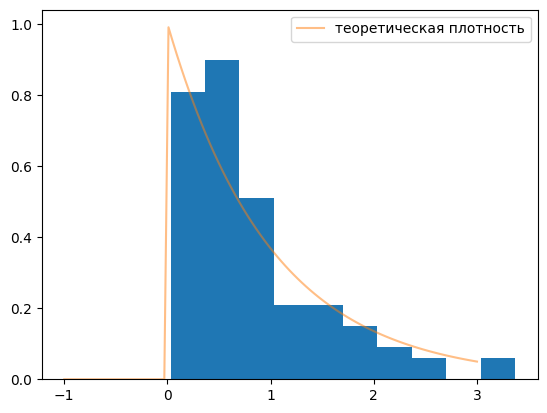

In [68]:
b,n,_=plt.hist(samp_ex, density=True)
x = np.linspace(-1,3,100)
pdf = ex.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
print(b,n)

In [9]:
samp_ex.mean()

np.float64(0.8195071807544204)

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

[]

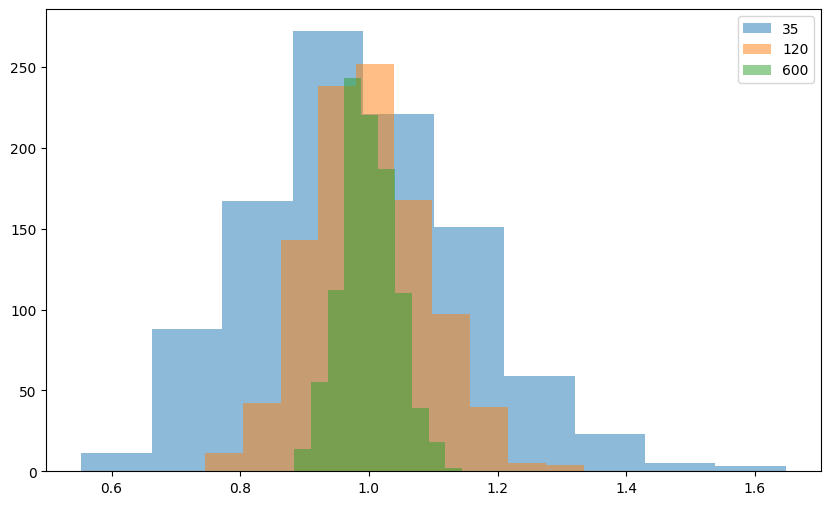

In [25]:
plt.figure(figsize=(10,6))
# Генерируем много выборочных средних (под ЦПТ)
for N in [35, 120, 600]:
    means_expon = []
    for i in range(1000):
         means_expon.append(np.mean(ex.rvs(N)))
    plt.hist(means_expon, alpha=0.5)

plt.legend(['35', '120', '600'])
plt.plot()

[]

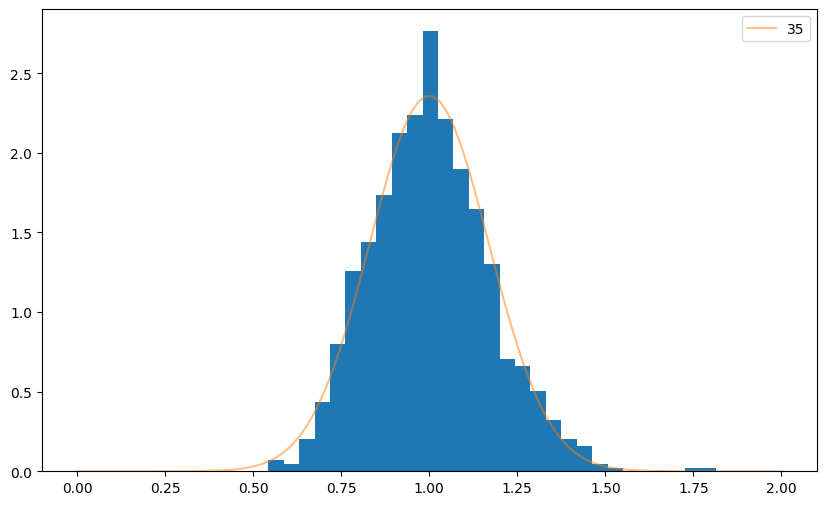

In [15]:
# Выборка объемом 35
ex=sts.expon()
plt.figure(figsize=(10,6))
N=35
means_35 = []
for i in range(1000):
    means_35.append(np.mean(ex.rvs(N)))
means_35 = np.array(means_35).astype(np.float32)
plt.hist(means_35, density=True, bins='auto')
norm_rv = sts.norm(loc=ex.mean(), scale=ex.std() / np.sqrt(N)) # если брать N- то получается выборочная дисперсия, если берем N-1, то получается несмещенная выборочная дисперсия
x=np.linspace(0,2,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
""" plt.figure(figsize=(10,6)) """

plt.legend([N],loc='upper right')
plt.plot()

[]

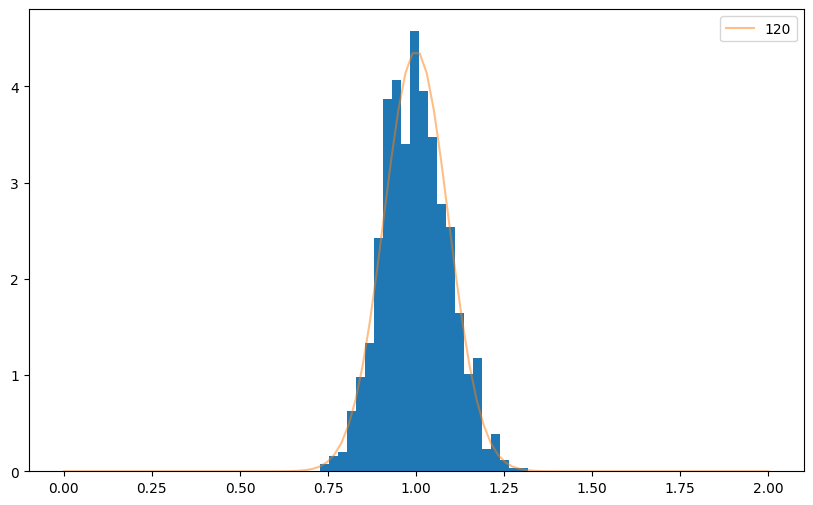

In [18]:
# Выборка объемом 120
ex=sts.expon()
plt.figure(figsize=(10,6))
N=120
means_120 = []
for i in range(1000):
    means_120.append(np.mean(ex.rvs(N)))
means_120 = np.array(means_120).astype(np.float32)
plt.hist(means_120, density=True, bins='auto')
norm_rv = sts.norm(loc=ex.mean(), scale=ex.std() / np.sqrt(N))
x=np.linspace(0,2,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)

plt.legend([N],loc='upper right')
plt.plot()

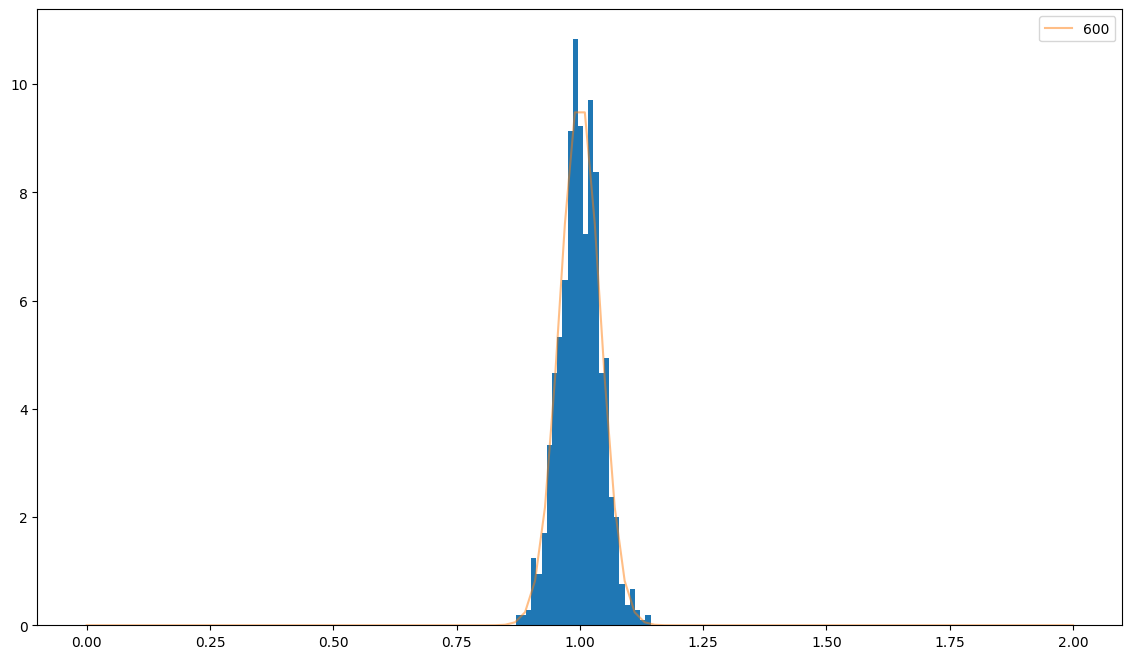

In [28]:
# Выборка объемом 950
ex=sts.expon()
plt.figure(figsize=(14,8))
N=600
means_600 = []
for i in range(1000):
    means_600.append(np.mean(ex.rvs(N)))
means_600 = np.array(means_600).astype(np.float32)
plt.hist(means_600, density=True, bins='auto')
norm_rv = sts.norm(loc=ex.mean(), scale=ex.std() / np.sqrt(N))
x=np.linspace(0,2,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)

plt.legend([N],loc='upper right')
plt.plot()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? 

Ваш ответ: Работает хорошо.

# Доверительный интервал на основе ЦПТ

Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

In [39]:
telecom=pd.read_csv('telecom_churn.csv')
telecom.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [40]:
telecom['churn']=telecom['churn'].astype(str)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Формируем данные по колонке Churn-False

In [45]:
# Формируем данные по колонке Churn-False
data_f=telecom.query('churn=="False"')
data_f
total_f=data_f.groupby(['state','phone number','churn'])['total day calls'].sum().reset_index()
total_f.head(4)

,state,phone number,churn,total day calls
0,AK,330-5462,False,129
1,AK,332-2275,False,84
2,AK,333-3704,False,105
3,AK,333-5295,False,88


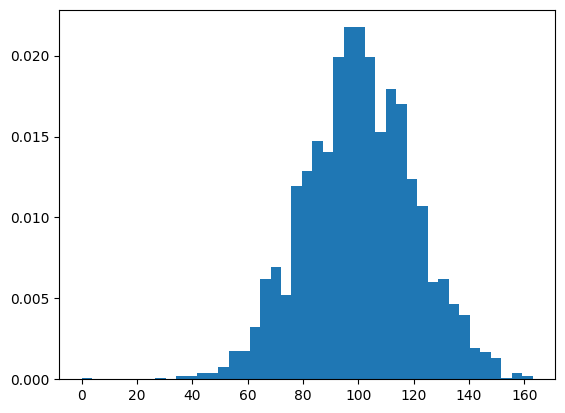

In [54]:
# Строим гистограмму
plt.hist(total_f['total day calls'], density=True, bins='auto')
plt.show()

In [43]:
# Формируем параметры: математическое ожидание, дисперсия, стандратное отклонение, количество наблюдений
mu=total_f['total day calls'].mean()
var=total_f['total day calls'].var(ddof=1)
q=total_f['total day calls'].std()
N=total_f['total day calls'].count()
print(round(mu,2),round(var,2),round(q,2),N)


100.28 392.09 19.8 2850


In [55]:
# Строим  95% доверительный интервал 
norm_rv=sts.norm()
alpha=0.05
z_crit=norm_rv.ppf(1-alpha/2)
left=mu-z_crit*np.sqrt(var/N)
rigth=mu+z_crit*np.sqrt(var/N)
print("Доверительный интервал для среднего по цпт: [{:.4};{:.4}] ширина {:.4}] ".format(left,rigth,rigth-left))

Доверительный интервал для среднего по цпт: [99.56;101.0] ширина 1.454] 


In [47]:
# Строим 95% доверительный интервал с помощью пакета skipy
mu=total_f['total day calls'].mean()
var=total_f['total day calls'].var(ddof=1)
sd=total_f['total day calls'].std(ddof=1)/np.sqrt(N)

sts.norm.interval(0.95,loc=mu,scale=sd)

(np.float64(99.55618833318324), np.float64(101.01012745629045))

In [48]:
# Строим 95% доверительный интервал с помощью пакета statsmodels
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(ssw._zconfint_generic(mu,  sd, alpha=.05 , alternative='two-sided')))

Доверительный интервал для среднего по цпт методом _zconfint_generic: (np.float64(99.55618833318324), np.float64(101.01012745629045)) 


(np.float64(98.51726202079539), np.float64(102.0490537686783))

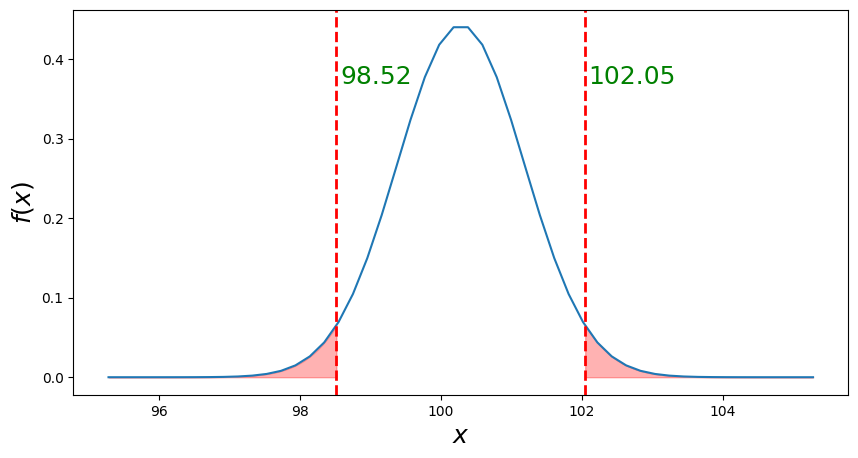

In [69]:
# Визуализация
def norm_conf_int(alpha, mu, sd, margin=5):

    plt.figure(figsize=(10,5))
    xs=np.linspace(mu-margin, mu+margin)
    pdf=sts.norm(mu,sd).pdf(xs)

    plt.plot(xs,pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)
    left, right=sts.norm.interval(1-alpha,loc=mu,scale=sd)

    for i in [left,right]:
        y_max=plt.ylim()[1]
        plt.axvline(i,color='red',linestyle='dashed', lw=2)

        if i==left: 
            xq=np.linspace(mu-margin, left)
        else: 
            xq=np.linspace(right,mu+margin)

        text_margin=0.05
        plt.text(i+text_margin, 0.8*y_max, round(i,2), color='green', fontsize=18)
        yq=sts.norm(mu,sd).pdf(xq)
        plt.fill_between(xq, 0, yq,color='red', alpha=0.3)

    return left, right
alpha=0.05
mu=total_f['total day calls'].mean()
sd=total_f['total day calls'].std(ddof=1)/np.sqrt(N)

norm_conf_int(alpha, mu, sd, margin=5)

# Формируем данные по колонке Churn-True

In [52]:
data_t=telecom.query('churn=="True"')
data_t
total_t=data_t.groupby(['state','phone number','churn'])['total day calls'].sum().reset_index()
total_t.head(4)

,state,phone number,churn,total day calls
0,AK,364-7719,True,58
1,AK,372-3750,True,94
2,AK,384-6132,True,118
3,AL,337-4600,True,80


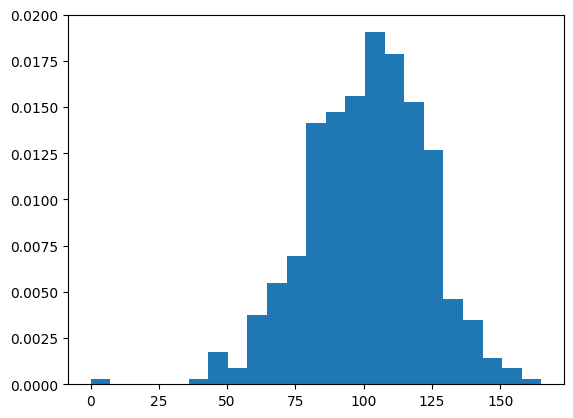

In [53]:
# Строим гистограмму
plt.hist(total_t['total day calls'], density=True, bins='auto')
plt.show()

In [56]:
# Формируем параметры: математическое ожидание, дисперсия, стандратное отклонение, количество наблюдений
mu=total_t['total day calls'].mean()
var=total_t['total day calls'].var(ddof=1)
q=total_t['total day calls'].std()
N=total_t['total day calls'].count()
print(round(mu,2),round(var,2),round(q,2),N)

101.34 465.8 21.58 483


In [59]:
# Строим  95% доверительный интервал 
norm_rv=sts.norm()
alpha=0.05
z_crit=norm_rv.ppf(1-alpha/2)
z_crit
left=mu-z_crit*np.sqrt(var/N)
rigth=mu+z_crit*np.sqrt(var/N)
print("Доверительный интервал для среднего по цпт: [{:.4}; {:.4}] ширина {:.4}] ".format(left,rigth,rigth-left))

Доверительный интервал для среднего по цпт: [99.41; 103.3] ширина 3.849] 


In [58]:
# Строим 95% доверительный интервал с помощью пакета skipy
mu=total_t['total day calls'].mean()
var=total_t['total day calls'].var(ddof=1)
sd=total_t['total day calls'].std(ddof=1)/np.sqrt(N)

sts.norm.interval(0.95,loc=mu,scale=sd)

(np.float64(99.41066229112079), np.float64(103.26014516229537))

In [60]:
# Строим 95% доверительный интервал с помощью пакета statsmodels
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(ssw._zconfint_generic(mu,  sd, alpha=.05 , alternative='two-sided')))

Доверительный интервал для среднего по цпт методом _zconfint_generic: (np.float64(99.41066229112079), np.float64(103.26014516229537)) 


(np.float64(98.51726202079539), np.float64(102.0490537686783))

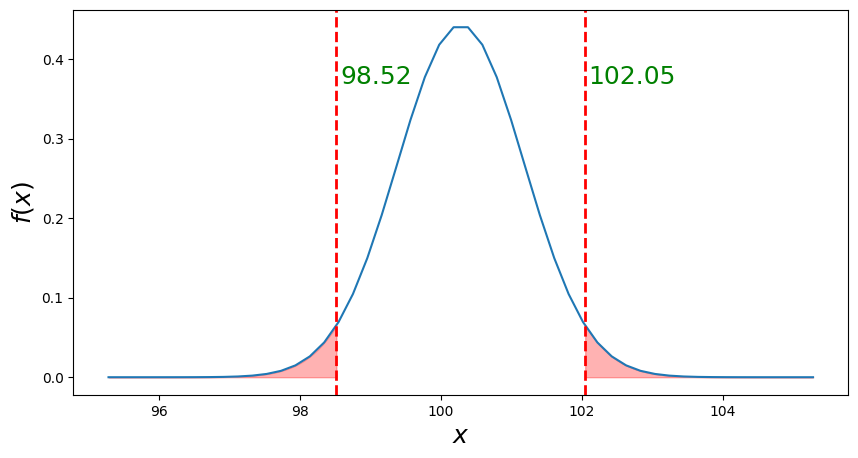

In [70]:
# Визуализация
def norm_conf_int(alpha, mu, sd, margin=5):

    plt.figure(figsize=(10,5))
    xs=np.linspace(mu-margin, mu+margin)
    pdf=sts.norm(mu,sd).pdf(xs)

    plt.plot(xs,pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)
    left, right=sts.norm.interval(1-alpha,loc=mu,scale=sd)

    for i in [left,right]:
        y_max=plt.ylim()[1]
        plt.axvline(i,color='red',linestyle='dashed', lw=2)

        if i==left: 
            xq=np.linspace(mu-margin, left)
        else: 
            xq=np.linspace(right,mu+margin)

        text_margin=0.05
        plt.text(i+text_margin, 0.8*y_max, round(i,2), color='green', fontsize=18)
        yq=sts.norm(mu,sd).pdf(xq)
        plt.fill_between(xq, 0, yq,color='red', alpha=0.3)

    return left, right
alpha=0.05
mu=total_f['total day calls'].mean()
sd=total_f['total day calls'].std(ddof=1)/np.sqrt(N)

norm_conf_int(alpha, mu, sd, margin=5)